In [1]:
import os
import glob 
from functools import reduce

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import random

In [3]:
from simulation.plot import *

---

In [4]:
logs_dir = "./logs"

In [5]:
plot_data = dict()
for i in glob.glob(logs_dir + "/num_bitmaps_*__seed_?/*.csv"):
    _list = i.split('/')
    num_bitmaps = _list[2].split('_')[2]
    log_name = _list[3].split('.')[0]

    if num_bitmaps not in plot_data:
        plot_data[num_bitmaps] = dict()
    
    if log_name in plot_data[num_bitmaps]:
        plot_data[num_bitmaps][log_name] = plot_data[num_bitmaps][log_name].append(
            pd.Series.from_csv(i), ignore_index=True)
    else:
        plot_data[num_bitmaps][log_name] = pd.Series.from_csv(i)

plot_data['10'].keys()

dict_keys(['redundancy_for_all_groups_in_all_tenants', 'rules_for_all_leafs_post_dp', 'rules_for_all_groups', 'rules_for_all_groups_post_dp', 'rules_for_all_leafs'])

In [6]:
rules_for_all_leafs_df = pd.DataFrame(columns=['No. of Rules', 'All Headers', 'No. of Headers'])

for i in ['10', '20', '30']:
    df = pd.DataFrame()
    df['No. of Rules'] = plot_data[i]['rules_for_all_leafs']
    df['All Headers'] = [False for _ in range(len(plot_data[i]['rules_for_all_leafs']))]
    df['No. of Headers'] = [int(i) for _ in range(len(plot_data[i]['rules_for_all_leafs']))]
    rules_for_all_leafs_df = rules_for_all_leafs_df.append(df)
    
    df = pd.DataFrame()
    df['No. of Rules'] = plot_data[i]['rules_for_all_leafs_post_dp']
    df['All Headers'] = [True for _ in range(len(plot_data[i]['rules_for_all_leafs_post_dp']))]
    df['No. of Headers'] = [int(i) for _ in range(len(plot_data[i]['rules_for_all_leafs_post_dp']))]
    rules_for_all_leafs_df = rules_for_all_leafs_df.append(df)
    

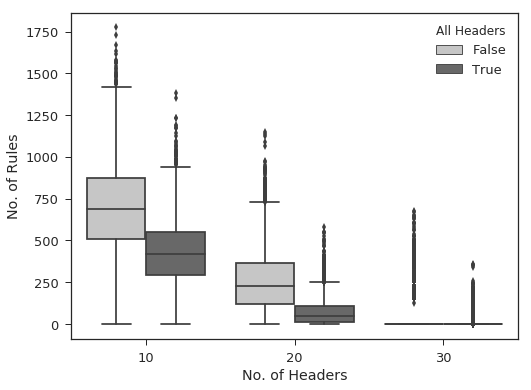

In [7]:
sb.set(style='ticks', font_scale=1.3)
sb.boxplot(x='No. of Headers', y='No. of Rules', hue='All Headers', data=rules_for_all_leafs_df, palette='Greys')
plt.savefig('rules_for_all_leafs.pdf')

In [8]:
rules_for_all_groups = pd.DataFrame(columns=['No. of Rules', 'All Headers', 'No. of Headers'])

for i in ['10', '20', '30']:
    df = pd.DataFrame()
    df['No. of Rules'] = plot_data[i]['rules_for_all_groups']
    df['All Headers'] = [False for _ in range(len(plot_data[i]['rules_for_all_groups']))]
    df['No. of Headers'] = [int(i) for _ in range(len(plot_data[i]['rules_for_all_groups']))]
    rules_for_all_groups = rules_for_all_groups.append(df)
    
    df = pd.DataFrame()
    df['No. of Rules'] = plot_data[i]['rules_for_all_groups_post_dp']
    df['All Headers'] = [True for _ in range(len(plot_data[i]['rules_for_all_groups_post_dp']))]
    df['No. of Headers'] = [int(i) for _ in range(len(plot_data[i]['rules_for_all_groups_post_dp']))]
    rules_for_all_groups = rules_for_all_groups.append(df)
    

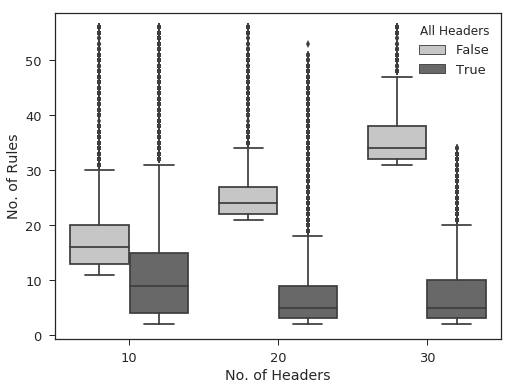

In [9]:
sb.set(style='ticks', font_scale=1.3)
sb.boxplot(x='No. of Headers', y='No. of Rules', hue='All Headers', data=rules_for_all_groups, palette='Greys')
plt.savefig('rules_for_all_groups.pdf')

In [10]:
redundancy_for_all_groups_in_all_tenants = pd.DataFrame(columns=['Redundancy', 'No. of Headers'])

for i in ['10', '20', '30']:
    df = pd.DataFrame()
    df['Redundancy'] = plot_data[i]['redundancy_for_all_groups_in_all_tenants']
    df['No. of Headers'] = [int(i) for _ in range(len(plot_data[i]['redundancy_for_all_groups_in_all_tenants']))]
    redundancy_for_all_groups_in_all_tenants = redundancy_for_all_groups_in_all_tenants.append(df)

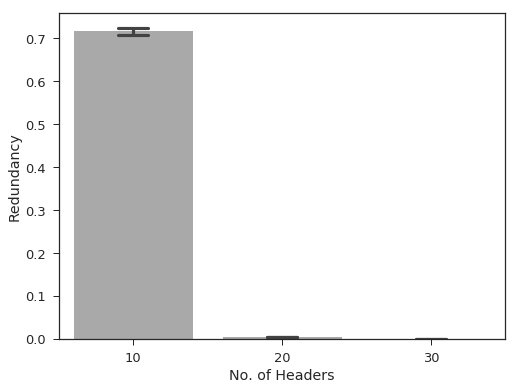

In [11]:
sb.set(style='ticks', font_scale=1.3)
sb.barplot(x='No. of Headers', y='Redundancy', data=redundancy_for_all_groups_in_all_tenants, color='darkgray',
          capsize=.2)
plt.savefig('redundancy_for_all_groups_in_all_tenants.pdf')